In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit CNN (adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),  # First Conv layer
    keras.layers.MaxPooling2D(2,2),  # Pooling layer
    keras.layers.Conv2D(64, (3,3), activation='relu'),  # Second Conv layer
    keras.layers.MaxPooling2D(2,2),  
    keras.layers.Flatten(),  # Flatten the features
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])


C:\Users\User\sample\test1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9133 - loss: 0.2847 - val_accuracy: 0.9860 - val_loss: 0.0439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9893 - val_loss: 0.0326
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9890 - val_loss: 0.0320
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9909 - val_loss: 0.0270
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9908 - val_loss: 0.0287


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9874 - loss: 0.0392
Test Accuracy: 99.08%


In [7]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


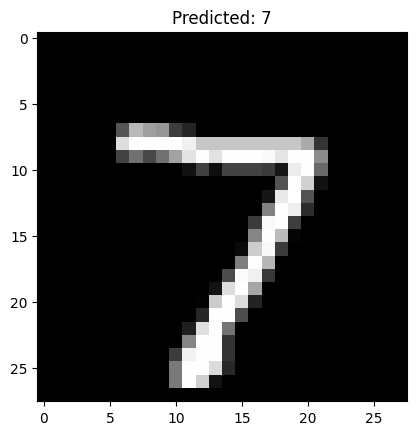

In [8]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Save model
model.save("mnist_cnn_model.h5")

print("Model saved as mnist_cnn_model.h5")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8841 - loss: 0.3558 - val_accuracy: 0.9806 - val_loss: 0.0561
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9846 - loss: 0.0498 - val_accuracy: 0.9901 - val_loss: 0.0305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9883 - loss: 0.0347 - val_accuracy: 0.9918 - val_loss: 0.0263
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9920 - loss: 0.0237 - val_accuracy: 0.9922 - val_loss: 0.0248
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9893 - val_loss: 0.0372


Model saved as mnist_cnn_model.h5


In [12]:
model = tf.keras.models.load_model("mnist_cnn_model.h5")
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-03-23 10:13:11.239 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 10:13:11.451 
  command:

    streamlit run C:\Users\User\sample\test1\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-23 10:13:11.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 10:13:11.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 10:13:11.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 10:13:11.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 10:13:11.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 10:13:11.456 Thread 'MainThread': 